# NLP: Project 2

Students: Marco RIVA, Michele PULVIRENTI

This notebook contains the code for the second project of the NLP course.

The project aims to implement NLP techniques in order to develop unsupervised models to be used for various use cases.

All the use cases implemented and the data exploration aspects developed in this notebook are also implemented in a **Streamlit** app. Specifically, the following features have been implemented:

- Exploratory Data Analysis (EDA):
    - **Most common words**: finding and visualization with a **Word Cloud** of the most common words in the reviews.
    - **Most common n-grams**: identification and visualization of the most common n-grams.
    - **Topic Modeling**: using **Latent Dirichlet Allocation** (LDA) to identify topics in the reviews.
    - **Similar words**: Finding similar words using embeddings and visualizing them with **t-SNE**.
- Modeling:
    - **Sentiment Analysis**: predicting the sentiment of reviews using **TF-IDF** and **classic ML**
    - **Review Rating Prediction**: predicting the star rating of reviews using a basic model with **Embedding Layer**
    - **Review Category Prediction**: predicting the category of reviews using **pre-trained embeddings**
    - **Semantic Search**: Finding similar reviews based on a query using **Universal Sentence Encoder**

 The Streamlit app is available locally (downloading the full [repository](https://github.com/MarcoRiva6/ML4NLP-project2) from GitHub and running `streamlit run entrypoint.py` in the venv's terminal) or at [this](https://ml4nlp-project2-6qzrsnb3spgf3gqd9hekpf.streamlit.app) page.


In [14]:
# Kernel preparation and imports statements
!pip install -q gdown
!pip install -q openpyxl
!pip install -q wordcloud
!pip install -q textblob
!pip install -q symspellpy
!pip install -q gensim
!pip install -q tensorflow
!pip install -q tensorboard
!pip install -q tensorflow-hub
!pip install -q googletrans==4.0.0-rc1
!pip install -q tiktoken
!pip install -q sentencepiece
# libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re

# 1.-2. Data Processing

In this section we will load the dataset and print basic information about it.

## Data loading
The dataset is split in 35 different files. Each of them will be loaded and concatenated in a single dataframe.

In [79]:
import gdown

def is_running_on_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

if is_running_on_colab():
    if False: # Mount
        from google.colab import drive
        drive.mount('/content/drive')
        main_path = '/content/drive/MyDrive/Colab Notebooks/NLP - Project 2/'
    else: # Download
        model_folder_fils = ['13Q8Es10KoPKSfpTapKwOwXPACAdXebjj', '1S-V1AHE0kprE9CzGVPS5poT9NSfaJMQL', '1Ynvwtfm4DVREFnH6Ucj6JdqOeyvy0QN2',
                             '1_3sxIjG9SMDkpppkZEFzxa2yZEiIxTTU', '10XHBTRBrtONTp2jE9FPGNWrwI4Z1dcX7', '17en_fYsGZlvT6p3BqxqKAyJfcooSx93_']
        trad_folder_files = ['1LVKLnrjdoCwER0Zji1VzckJroNU-ZphW', '1yymq64cA7Unw6S4IPQKokAcHtBw6az_8', '1G_wLt9Qe0UniGlLNh1wNVaL8FQF33sDr',
                             '1Hb77NRMv7kJ9GFWkIeL4Nyze54sBdAOr', '1dQDsM2-2QrP4szX5OVcHpYGmd196Oux-', '1rkBNCTMV9flMIgbpHu3r4TTISK4uPlZZ',
                             '1zcskx_ytcN75vOwUMER-Lvr-0_f4CB5x', '11wv0-FdToXsggbeERAJrd0Rcxt6ZI4oW', '1_VZa19nKKq25zdiHEi21y-vLsEyRfYpA',
                             '1wJSDcr-SP0eVaiVvfw2ESK69Yfol4SLW', '1wSnNO3azcsYbjGhgOHYbt7g7Q_lvCuEu', '1aIrJQ7u_QDWMDqk5VZ93WOItbTVbwMea',
                             '19Tx4LpitAB4AhEAnR0N7J4vJ0wGErNBU', '1Mbd26wRYiGWDCQC7zENV1rMhbGEGiWZT', '1_gaJTyxhdoSUA6GVdiERJE_k-XREcf1a',
                             '1RsUSQP-FqhXgvzKZVLQhSPmQUf0K5jyn', '1BwJ_9LwI1lCjmcusskHAAmMVjkWyr3ee', '1w8fccTZc536vQi7moES5A1Q9Caiq-_-6',
                             '1iNKZVSvvIpIkBFJ14JQ93j5B6pwrik40', '1AL8DXpQd7Fu9aNsnXvn8aTtgqLE-5nNP', '1iJUry4ybIqHbkCbJ3EIPFNJAFIepjqsy',
                             '1Zebc5LBXPncZTWRIilYMdsLEpJAHaDSd', '19iZ6ePy2YDK1nM33sYjlT8pZJWcBRt5S', '1QQu3ToKtjZW0XcQ0QnrcNBbuiAfcQykp',
                             '1YtFlfgQaH-rqtZfm4CVO9br9HwNfv3u9', '1DwAFdzzHDtoIJspf595KEYg4kI26i3jY', '1wsIaXojFD8C-eUvw70wpMUl4AMdkDi6F',
                             '1I6ORRDSg00FC5jaYpe3rgMO90RohjGZ2', '1sAG2QJTr1miy4KsrtVmoD8_LtrTgcU7i', '11ei-hu3budhWQW87mLwGilUZjonabAl5',
                             '1Hrdsi349BBDWSjuuLqnoKsKXmyN0h76t', '19Zl3tkVL4oebeqPrRCqCGQ9zb959OJMp', '1YEnvjXSSOylSJVlersZOk5m4aB3jAaJ7',
                             '1HfstvSX6wiZnemAoEES2cq6hPYbrR9Fa', '1-NqMwwLoIP6KEkixhhD4WAQEFA9-mHq6', '1K77XhWNQ4e1WpNr1lcJGr2x_DpzZj-oZ',
                             '1CYnH5GHRmylFVprCknor1O8YQRG6tDr3', '13mpDflrO19icw3mG_xJsxvTZDGDD-4P_']
        main_folder_files = ['1i8eb--ivmcweJ46F8hQgJcnYHleq0VO-', '1sCBCI1fhf8pvyGt9cuqyzK0btFdpmInn', '1FWyHSrf7e9gwmUP4-LHqB3BxTauc8GEM']
        for file in main_folder_files:
            gdown.download(id=file, output='/content/', resume=True, quiet=False)
        os.mkdir('/content/Traduction avis clients')
        for file in trad_folder_files:
            gdown.download(id=file, output='/content/Traduction avis clients', resume=True, quiet=False)
        os.mkdir('/content/models')
        for file in model_folder_fils:
            gdown.download(id=file, output='/content/models', resume=True, quiet=False)
        
        main_path = '/content/'
    data_path = main_path + 'Traduction avis clients'
    models_path = main_path + 'models'
else:
    main_path = './'
    data_path = './Traduction avis clients'
    models_path = './models'

In [15]:
data_files = [f'avis_{i}_traduit.xlsx' for i in range(1, 36)]

columns_dtypes = {
    'note': 'float',
    'auteur': 'string',
    'avis': 'string',
    'assureur': 'string',
    'produit': 'string',
    'type': 'string',
    'date_publication': 'string',
    'date_exp': 'string',
    'avis_cor': 'string',
    'avis_en': 'string',
    'avis_cor_en': 'string'
}

In [16]:
df = pd.concat([pd.read_excel(os.path.join(data_path, file), engine='openpyxl', dtype=columns_dtypes) for file in data_files], ignore_index=True)
df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, price, solutions, listening, s...",<NA>,<NA>
1,4.0,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",<NA>,<NA>
2,5.0,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price Several options are avai...,<NA>,<NA>
3,4.0,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I satisfy the service, a very fast response fr...",<NA>,<NA>
4,1.0,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for more than 25 years, very disappoi...",<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,test,24/08/2021,01/08/2021,"Hello, I have a bad experience with the Socoba...","Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,Company very impacted by the covid- event sect...,Entreprise très impactée par le covid- secteur...,<NA>
34432,NaN,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,"Following a burglary on 01/22/2021, I am still...","Suite a un cambriolage le 22/01/2021, je suis ...",<NA>
34433,NaN,lkio-110907,"Bonjour, Je constate qu'entre le moment de ma...",Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,"Hello, I note that between the time of my req...","Bonjour, Je constate qu'entre le moment de ma...",<NA>


## Basic information

Some basic information about the dataset is printed below.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   note              24104 non-null  float64
 1   auteur            34434 non-null  string 
 2   avis              34435 non-null  string 
 3   assureur          34435 non-null  string 
 4   produit           34435 non-null  string 
 5   type              34435 non-null  string 
 6   date_publication  34435 non-null  string 
 7   date_exp          34435 non-null  string 
 8   avis_en           34433 non-null  string 
 9   avis_cor          435 non-null    string 
 10  avis_cor_en       431 non-null    string 
dtypes: float64(1), string(10)
memory usage: 2.9 MB


In [18]:
df.nunique()

note                    5
auteur              33569
avis                34377
assureur               56
produit                13
type                    2
date_publication     1815
date_exp               61
avis_en             33264
avis_cor              435
avis_cor_en           431
dtype: int64

In [19]:
df.isna().sum()

note                10331
auteur                  1
avis                    0
assureur                0
produit                 0
type                    0
date_publication        0
date_exp                0
avis_en                 2
avis_cor            34000
avis_cor_en         34004
dtype: int64

## Train-Test split inspection

We can notice that the dataset is already provided with a train-test division, using the `type` column.

The test set is provided with the columns **avis_cor** and **avis_cor_en** filled, and without the **note** column. We can then split the dataset, using the already provided division.

In [20]:
df_train = df[df['type'] == 'train']
df_test = df[df['type'] == 'test']

In [21]:
print(df_train.shape)
df_train.isna().sum()

(24104, 11)


note                    0
auteur                  1
avis                    0
assureur                0
produit                 0
type                    0
date_publication        0
date_exp                0
avis_en                 1
avis_cor            24104
avis_cor_en         24104
dtype: int64

In [22]:
print(df_test.shape)
df_test.isna().sum()

(10331, 11)


note                10331
auteur                  0
avis                    0
assureur                0
produit                 0
type                    0
date_publication        0
date_exp                0
avis_en                 1
avis_cor             9896
avis_cor_en          9900
dtype: int64

## Data Cleaning

In this section we will perform some basic data cleaning operations on the dataset. In order to have a fare dataset, these operations will be perfomed on the full dataset (the **df** ojbect), which will be later (again) splitted in train and test sets.

The following operations will be performed:
- Check for empty reviews
- Translate missing reviews in english
- Remove non-text characters
- Perform spelling correction
- Lower text
- Remove stopwords and punctualization
- Save the cleaned dataset

### Empty reviews or translations

As seen it can be seen in the previous cells, there are no empty reviews (`avis`), while there are just 2 missing translations (`avis_en`). We can then translate these reviews in the next subsection.

In [23]:
df[df['avis_en'].isna()]

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
9999,5.0,sylvie007-57005,"La rapidité du traitement de dossier, de l'env...",L'olivier Assurance,auto,train,04/09/2017,01/09/2017,<NA>,<NA>,<NA>
29867,NaN,moimeme-51557,Aucun,MACIF,auto,test,23/01/2017,01/01/2017,<NA>,<NA>,<NA>


### Translation

The related reviews are translated using the `googletrans` library.

In [24]:
from googletrans import Translator

translator = Translator()

def translate_to_english(text, lang):
    try:
        if lang == 'en':
            return text  # No translation needed
        translated = translator.translate(text, src=lang, dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating text: {text}. Error: {e}")
        return None

for row in df[df['avis_en'].isna()].itertuples():
    df.loc[row.Index, 'avis_en'] = translate_to_english(row.avis, 'fr')

df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, price, solutions, listening, s...",<NA>,<NA>
1,4.0,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",<NA>,<NA>
2,5.0,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price Several options are avai...,<NA>,<NA>
3,4.0,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I satisfy the service, a very fast response fr...",<NA>,<NA>
4,1.0,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for more than 25 years, very disappoi...",<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,test,24/08/2021,01/08/2021,"Hello, I have a bad experience with the Socoba...","Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,Company very impacted by the covid- event sect...,Entreprise très impactée par le covid- secteur...,<NA>
34432,NaN,victor-109599,"Suite a un cambriolage le 22/01/2021, je suis ...",Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,"Following a burglary on 01/22/2021, I am still...","Suite a un cambriolage le 22/01/2021, je suis ...",<NA>
34433,NaN,lkio-110907,"Bonjour, Je constate qu'entre le moment de ma...",Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,"Hello, I note that between the time of my req...","Bonjour, Je constate qu'entre le moment de ma...",<NA>


### Foreign characters

We can also ensure that there are no non-text characters in the reviews.

In [25]:
def clean_text(text):
    # Keep Unicode letters, digits, spaces, and basic punctuation
    return re.sub(r'[^\w\s.,!?\'\"-]', '', text.replace("\n", ""), flags=re.UNICODE)

def clean_reviews(df, columns):
    for column in columns:
        df[column] = df[column].apply(clean_text)
    
clean_reviews(df, ['avis', 'avis_en'])

### Spelling correction

In this section we will perform a basic spelling correction on the reviews. The `symspellpy` library will be used for this purpose, because it is simple and easy to implement. It also one of the few libraries that can correct compound words and also support languages other than english.

In [26]:
from symspellpy import SymSpell
from tqdm import tqdm
from textblob import TextBlob

# load final version of the dataset, to check if the spelling correction was already performed, so to skip it, since it is a very heavy operation
df_cleaned = pd.read_pickle(os.path.join(data_path, 'dataset_cleaned.pkl'))

def correct_english_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary(os.path.join(main_path, "fr-100k.txt"), term_index=0, count_index=1)

def correct_french_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

def spellchecking(df, final=None):
    df = df.copy()
    if final is None:
        final = df
    for row in tqdm(df.itertuples(), total=len(df)):
        if not isinstance(final.loc[row.Index, 'avis_cor'], str):
            try:
                df.loc[row.Index, 'avis_cor'] = correct_french_spelling(row.avis)
            except Exception as e:
                df.loc[row.Index, 'avis_cor'] = row.avis
        else:
            df.loc[row.Index, 'avis_cor'] = final.loc[row.Index, 'avis_cor']

        if not isinstance(final.loc[row.Index, 'avis_cor_en'], str):
            try:
                df.loc[row.Index, 'avis_cor_en'] = correct_english_spelling(row.avis_en)
            except Exception as e:
                df.loc[row.Index, 'avis_cor_en'] = row.avis_en
        else:
            df.loc[row.Index, 'avis_cor_en'] = final.loc[row.Index, 'avis_cor_en']
    return df

df = spellchecking(df, df_cleaned)
df

100%|██████████| 34435/34435 [2:34:27<00:00,  3.72it/s]     


,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, price, solutions, listening, s...",meilleurs assurances prix solutions écoute rap...,"West insurance, price, solutions, listening, s..."
1,4.0,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",je suis globalement satisfait sauf que vous av...,"I am generally satisfied, except that you have..."
2,5.0,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price Several options are avai...,prix très abordable plusieurs options s offran...,Very unfordable price Several option are avail...
3,4.0,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I satisfy the service, a very fast response fr...",je satisfait du service une réponse très rapid...,"I satisfy the service, a very fast response fr..."
4,1.0,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for more than 25 years, very disappoi...",client depuis plus de de ans très dé u de cett...,"Customer for more than 25 years, very disappoi..."
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,test,24/08/2021,01/08/2021,"Hello, I have a bad experience with the Socoba...","Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,Company very impacted by the covid- event sect...,Entreprise très impactée par le covid- secteur...,Company very impacted by the could- event sect...
34432,NaN,victor-109599,"Suite a un cambriolage le 22012021, je suis to...",Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,"Following a burglary on 01222021, I am still w...","Suite a un cambriolage le 22/01/2021, je suis ...","Following a burglars on 01222021, I am still w..."
34433,NaN,lkio-110907,"Bonjour,Je constate qu'entre le moment de ma d...",Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,"Hello,I note that between the time of my reque...","Bonjour, Je constate qu'entre le moment de ma...","Hello,I note that between the time of my reque..."


We can visualize some of the reviews that have been corrected.

In [27]:
df[df['avis'] != df['avis_cor']]

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,train,06/09/2021,01/09/2021,"Best insurance, price, solutions, listening, s...",meilleurs assurances prix solutions écoute rap...,"West insurance, price, solutions, listening, s..."
1,4.0,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,train,03/05/2021,01/05/2021,"I am generally satisfied, except that you have...",je suis globalement satisfait sauf que vous av...,"I am generally satisfied, except that you have..."
2,5.0,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,train,21/03/2021,01/03/2021,Very affordable price Several options are avai...,prix très abordable plusieurs options s offran...,Very unfordable price Several option are avail...
3,4.0,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,train,10/06/2021,01/06/2021,"I satisfy the service, a very fast response fr...",je satisfait du service une réponse très rapid...,"I satisfy the service, a very fast response fr..."
4,1.0,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,train,29/01/2017,01/01/2017,"Customer for more than 25 years, very disappoi...",client depuis plus de de ans très dé u de cett...,"Customer for more than 25 years, very disappoi..."
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,"Bonjour, j'ai une mauvaise expérience avec la ...",Sma,garantie-decennale,test,24/08/2021,01/08/2021,"Hello, I have a bad experience with the Socoba...","Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,Entreprise très impactée par le covid- secteur...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,Company very impacted by the covid- event sect...,Entreprise très impactée par le covid- secteur...,Company very impacted by the could- event sect...
34432,NaN,victor-109599,"Suite a un cambriolage le 22012021, je suis to...",Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,"Following a burglary on 01222021, I am still w...","Suite a un cambriolage le 22/01/2021, je suis ...","Following a burglars on 01222021, I am still w..."
34433,NaN,lkio-110907,"Bonjour,Je constate qu'entre le moment de ma d...",Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,"Hello,I note that between the time of my reque...","Bonjour, Je constate qu'entre le moment de ma...","Hello,I note that between the time of my reque..."


### Text lowering

Beofre proceeding, we can also lower the text in the reviews.

In [39]:
def lower_text(text):
    return text.lower()

def lower_reviews(df, columns):
    for column in columns:
        df[column] = df[column].apply(lower_text)
        
lower_reviews(df, ['avis', 'avis_en'])

### Stopwords and punctualization removal

Punctualization and stopwords are removed from the reviews.

In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df['avis'] = df['avis'].apply(preprocess_text)
df['avis_en'] = df['avis_en'].apply(preprocess_text)
df

[nltk_data] Downloading package punkt_tab to /Users/Marco/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Marco/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rap...,Direct Assurance,auto,train,06/09/2021,01/09/2021,best insurance price solutions listening speed...,meilleurs assurances prix solutions écoute rap...,"West insurance, price, solutions, listening, s..."
1,4.0,bernard-g-112497,globalement satisfait sauf problème site inter...,Direct Assurance,auto,train,03/05/2021,01/05/2021,i am generally satisfied except that you have ...,je suis globalement satisfait sauf que vous av...,"I am generally satisfied, except that you have..."
2,5.0,virginie-t-107352,prix tres abordable plusieurs options a comme ...,Direct Assurance,auto,train,21/03/2021,01/03/2021,very affordable price several options are avai...,prix très abordable plusieurs options s offran...,Very unfordable price Several option are avail...
3,4.0,boulain-f-116580,satisfait service réponse très rapide service ...,L'olivier Assurance,auto,train,10/06/2021,01/06/2021,i satisfy the service a very fast response fro...,je satisfait du service une réponse très rapid...,"I satisfy the service, a very fast response fr..."
4,1.0,ouaille31-51798,client depuis plus ans très déçu cette mutuell...,Matmut,auto,train,29/01/2017,01/01/2017,customer for more than years very disappointed...,client depuis plus de de ans très dé u de cett...,"Customer for more than 25 years, very disappoi..."
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,bonjour mauvaise expérience socobat btp créé s...,Sma,garantie-decennale,test,24/08/2021,01/08/2021,hello i have a bad experience with the socobat...,"Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,entreprise très impactée secteur événementiel ...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,company very impacted by the event sector and ...,Entreprise très impactée par le covid- secteur...,Company very impacted by the could- event sect...
34432,NaN,victor-109599,suite a cambriolage toujours leurs décisions f...,Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,following a burglary i am still waiting for th...,"Suite a un cambriolage le 22/01/2021, je suis ...","Following a burglars on 01222021, I am still w..."
34433,NaN,lkio-110907,bonjour constate moment demande versement fond...,Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,hello i note that between the time of my reque...,"Bonjour, Je constate qu'entre le moment de ma...","Hello,I note that between the time of my reque..."


### Save the cleaned dataset

The cleaned version of the dataset is saved in a pickle file.

In [31]:
if not os.path.exists(os.path.join(data_path, 'dataset_cleaned.pkl')):
    df.to_pickle(os.path.join(data_path, 'dataset_cleaned.pkl'))

## Reaload data

In [32]:
df = pd.read_pickle(os.path.join(data_path, 'dataset_cleaned.pkl'))
df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,5.0,brahim--k-131532,meilleurs assurances prix solutions écoute rap...,Direct Assurance,auto,train,06/09/2021,01/09/2021,best insurance price solutions listening speed...,meilleurs assurances prix solutions écoute rap...,"West insurance, price, solutions, listening, s..."
1,4.0,bernard-g-112497,globalement satisfait sauf problème site inter...,Direct Assurance,auto,train,03/05/2021,01/05/2021,i am generally satisfied except that you have ...,je suis globalement satisfait sauf que vous av...,"I am generally satisfied, except that you have..."
2,5.0,virginie-t-107352,prix tres abordable plusieurs options a comme ...,Direct Assurance,auto,train,21/03/2021,01/03/2021,very affordable price several options are avai...,prix très abordable plusieurs options s offran...,Very unfordable price Several option are avail...
3,4.0,boulain-f-116580,satisfait service réponse très rapide service ...,L'olivier Assurance,auto,train,10/06/2021,01/06/2021,i satisfy the service a very fast response fro...,je satisfait du service une réponse très rapid...,"I satisfy the service, a very fast response fr..."
4,1.0,ouaille31-51798,client depuis plus ans très déçu cette mutuell...,Matmut,auto,train,29/01/2017,01/01/2017,customer for more than years very disappointed...,client depuis plus de de ans très dé u de cett...,"Customer for more than 25 years, very disappoi..."
...,...,...,...,...,...,...,...,...,...,...,...
34430,NaN,mamybouly-129360,bonjour mauvaise expérience socobat btp créé s...,Sma,garantie-decennale,test,24/08/2021,01/08/2021,hello i have a bad experience with the socobat...,"Bonjour, j'ai une mauvaise expérience avec la ...","Hello, I have a bad experience with the Socoba..."
34431,NaN,tarti-88637,entreprise très impactée secteur événementiel ...,Allianz,assurances-professionnelles,test,18/05/2021,01/05/2021,company very impacted by the event sector and ...,Entreprise très impactée par le covid- secteur...,Company very impacted by the could- event sect...
34432,NaN,victor-109599,suite a cambriolage toujours leurs décisions f...,Allianz,assurances-professionnelles,test,08/04/2021,01/04/2021,following a burglary i am still waiting for th...,"Suite a un cambriolage le 22/01/2021, je suis ...","Following a burglars on 01222021, I am still w..."
34433,NaN,lkio-110907,bonjour constate moment demande versement fond...,Generali,assurances-professionnelles,test,19/04/2021,01/04/2021,hello i note that between the time of my reque...,"Bonjour, Je constate qu'entre le moment de ma...","Hello,I note that between the time of my reque..."


## Important Remark on data

For all the following tasks, analysis and models in this notebook, we have chosen to work on the **french version** of the reviews, so to have more challenging and interesting results. Still, the english reviews have been posed under the same preprocessing as the french ones, and they are saved in the final version of the cleaned dataset (saved in the previous cell).

## Frequent wordings

In this section we will analyze the most frequent words and grams in the reviews.

### Most common words

The most common words will be displayed in a word cloud, using the `wordcloud` library.

The word cloud has been integrated also in the streamlit app.

In [33]:
from collections import Counter

word_counts = Counter(" ".join(df['avis']).split())
most_common_words = word_counts.most_common(10)

df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Occurrences'])

df_most_common_words

,Word,Occurrences
0,a,24224
1,très,13302
2,assurance,12640
3,plus,11792
4,service,9016
5,prix,8618
6,bien,7203
7,contrat,7018
8,depuis,6793
9,tout,6792


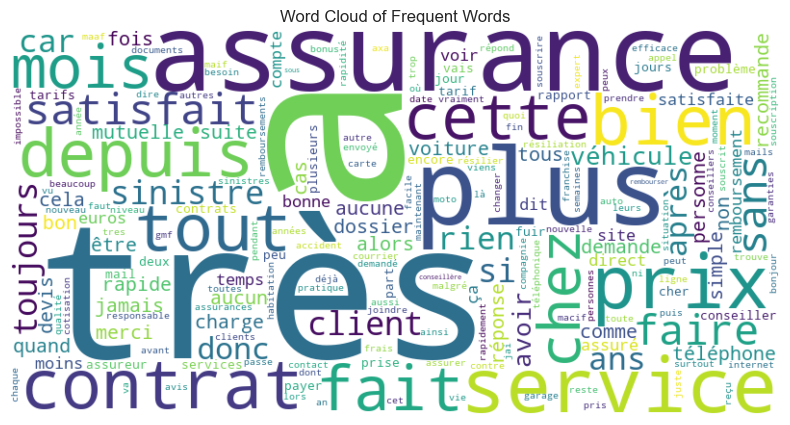

In [34]:
from wordcloud import WordCloud

wordcloud = (WordCloud(width=800, height=400, background_color='white', min_word_length=0).fit_words(word_counts))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

### Most common n-grams

This section develop the necessary code to find the most common n-grams in the reviews.

The most common 2 and 3 grams will be displayed in a bar chart.

This analysis has been integrated also in the streamlit app, interactively: the user can select the n-grams to find and the range of the found results to display.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3))  # bigrams and trigrams
ngrams = vectorizer.fit_transform(df['avis'])

ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
ngram_counts.columns = ['Frequency']
ngram_counts = ngram_counts.sort_values(by='Frequency', ascending=False).head(100)

ngram_counts

,Frequency
cette assurance,2303
service client,2088
direct assurance,1830
satisfait service,1729
prise charge,1350
...,...
sinistre non,231
prendre charge,230
prise compte,226
nouveau contrat,226


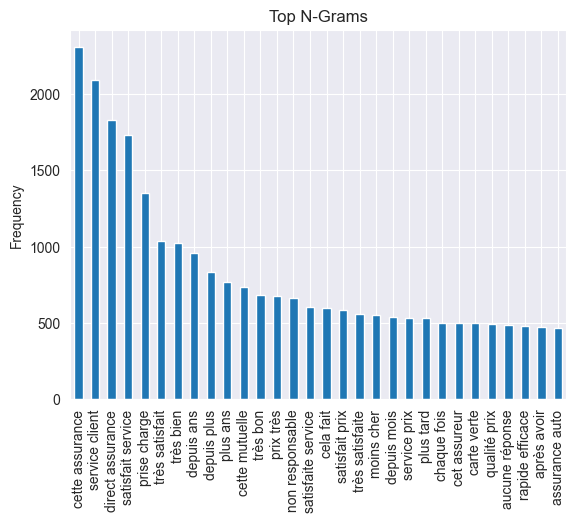

In [36]:
ngram_counts.head(30).plot(kind='bar', legend=False)
plt.title("Top N-Grams")
plt.ylabel("Frequency")
plt.show()

# 3. Topic Modeling

In this section we will perform a topic modeling analysis. The found topics will be assigned to the reviews, and later used for category prediction (in the Modeling section).

Additionally, the topics will be visualized using a heatmap. The heatmap visualization is also integrated interactively within the streamlit app.

## Topic Modeling with LDA

In this section we will perform a topic modeling analysis on the reviews using the Latent Dirichlet Allocation (LDA) algorithm.

4 Topics are identified and assigned to the reviews.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

num_topics = 4

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['avis'])

terms = vectorizer.get_feature_names_out()

from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

topics = display_topics(lda, terms, no_top_words=10)
print("Topics and their top words:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

Topics and their top words:
Topic 1: fuir, verrai, renseignée, promo, erika, interrogations, nadège, reprocher, accueillante, aminata
Topic 2: très, prix, satisfait, service, rapide, assurance, satisfaite, recommande, simple, bien
Topic 3: plus, mois, depuis, contrat, toujours, assurance, fait, mutuelle, faire, cette
Topic 4: ans, plus, assurance, sinistre, véhicule, chez, voiture, depuis, bonus, sans


Given the 4 resulting topics and their top words we can assign a title to each topic.

Topic 1: **Policy Claims**

The presence of words like ans, depuis, and augmentation suggests discussions about long-term experiences, possibly related to policy terms, claim history (sinistre), and premium increases.

Topic 2: **Satisfaction and Pricing**

Words like prix, satisfait, and recommande suggest reviews discussing pricing, satisfaction, and general feedback about service and value.

Topic 3: **Service Experience**

Words like téléphonique, accueil, and service imply feedback related to customer service interactions, especially over the phone.

Topic 4: **Contracts and Policy Management**

Words like contrat, depuis, and fait indicate discussions about contracts, durations, and issues regarding agreements or policies.

We can then annotate the topics in the dataset.



In [38]:
topic_labels = {
    1: "Policy Claims",
    2: "Satisfaction and Pricing",
    3: "Service Experience",
    4: "Contracts and Policy Management"
}

In [39]:
# Assign the most probable topic to each document
document_topics = lda.transform(tfidf_matrix)
df['topic'] = document_topics.argmax(axis=1) + 1

df['topic'] = df['topic'].map(topic_labels)

We can save the dataset with the assigned topics, as well as the model.

In [40]:
if not os.path.exists(os.path.join(data_path, 'dataset_cleaned_topics.pkl')):
    df.to_pickle(os.path.join(data_path, 'dataset_cleaned_topics.pkl'))

In [41]:
df = pd.read_pickle(os.path.join(data_path, 'dataset_cleaned_topics.pkl'))

In [42]:
with open(os.path.join(models_path, 'lda_model.pkl'), 'wb') as file:
    pickle.dump(lda, file)

## Topic Visualization

We can use an heatmap to visualize the topics and their top words.

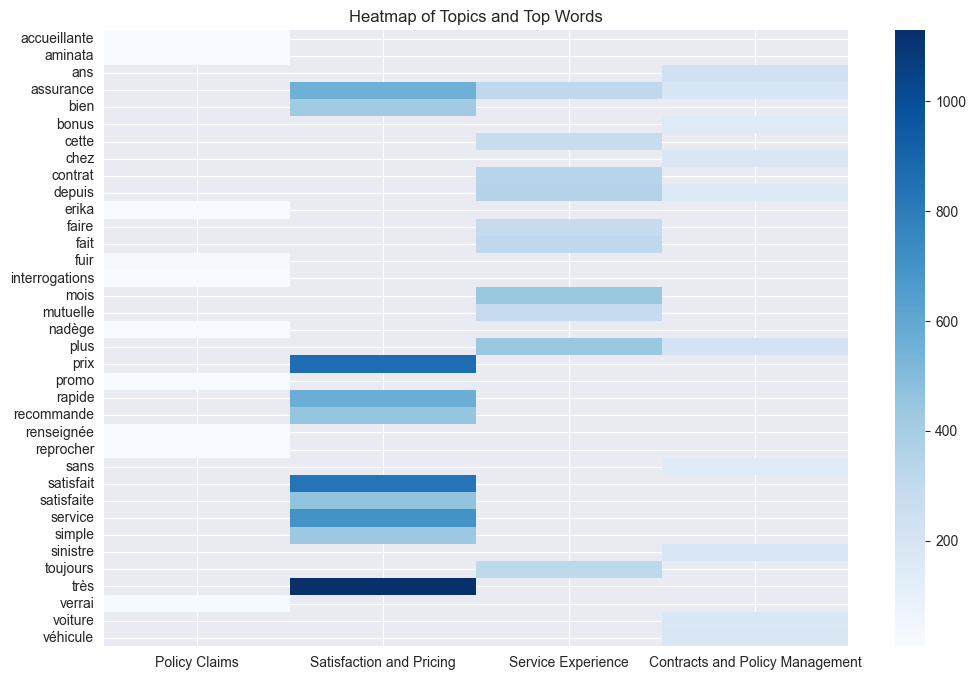

In [43]:
import seaborn as sns

# Create a dataframe for heatmap
import pandas as pd
heatmap_data = pd.DataFrame(lda.components_, index=[f"{topic_labels[i+1]}" for i in range(num_topics)], columns=terms)
top_terms_per_topic = heatmap_data.apply(lambda x: x.nlargest(10), axis=1)  # Top 10 terms per topic

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_terms_per_topic.T, annot=False, cmap='Blues')
plt.title("Heatmap of Topics and Top Words")
plt.show()

The heatmap visually represents the relationship between the topics discovered during the topic modeling process and the most frequent words associated with each topic.

The columns represent the different topics derived from the topic modeling process. The rows represent the most frequent and meaningful words associated with these topics.

Words like "prix", "satisfait", and "service" are indicative of customer feedback about Satisfaction and Pricing. Words such as "contrat", "fait", and "toujours" strongly correspond to the topic "Contracts and Policy Management".

The lighter or darker shades of the heatmap reflect the frequency or relevance of a word to a particular topic. For instance:
- The word "satisfait" shows high relevance to the "Satisfaction and Pricing" topic.
- The word "augmentation" is closely tied to "Contracts and Policy Management", likely referencing customer concerns about contract or policy premium increases.
- The word "service" appears prominently under "Service Experience", highlighting its importance in that category.


We can identify dominant themes in customer feedback:
- "Satisfaction and Pricing" stands out for frequently discussed terms like "prix" and "recommande", indicating a strong focus on pricing and recommendations.
- "Policy Claims" is associated with words like "sinistre" and "augmentation", reflecting concerns about claims and related policies.
- "Service Experience" emphasizes terms like "très satisfait", "téléphonique", and "accueil", suggesting that customer interaction and support are critical.

# 4. Embedding to Identify Similar Words

In order to implement the embedding to identify similar words, we are going to use a **Word2Vec**-based approach to analyze word relationships the reviews.
The basic Word2Vec is extended by allowing to find similar words based on cosine or euclidean similarity.
Finally, **t-SNE** is used to visualize the found word embeddings in a 2D space.

The analysis is also integrated in the Streamlit app, interactively. In fact, the user can choose:
- The word to find similar words for
- The similarity metric to use (cosine or euclidean)
- The number of similar words to display

The t-SNE visualization of the word embeddings is also integrated in the app, where the number of words to display can be customized.

## Preparation

The workflow for obtaining the similarity score is the following:
1. Retrieve the vector of the target word.
2. Loop through all other words in the vocabulary.
3. Compute the selected metric between the target word and each vocabulary word.
4. Sort the results based on the similarity or distance scores.
5. Return the top n words along with their similarity or distance scores.

In [44]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Train Word2Vec model
tokenized_reviews = [word_tokenize(review.lower()) for review in df['avis']]
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4, sg=1)

def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def cosine_similarity_manual(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def find_similar_words(word, topn=10, metric="cosine"):
    if word not in model.wv:
        return f"Word '{word}' not in vocabulary."

    word_vector = model.wv[word]
    similarities = []

    for other_word in model.wv.index_to_key:
        if other_word == word:
            continue
        other_vector = model.wv[other_word]

        if metric == "cosine":
            similarity = cosine_similarity_manual(word_vector, other_vector)
        elif metric == "euclidean":
            similarity = -euclidean_distance(word_vector, other_vector)  # Negate to sort by similarity
        else:
            raise ValueError("Invalid metric. Use 'cosine' or 'euclidean'.")

        similarities.append((other_word, similarity))

    # Sort and return top-n similar words
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return similarities[:topn]

In [45]:
# Save the model
if not os.path.exists(os.path.join(models_path, 'word2vec_model')):
    model.save(os.path.join(models_path, 'word2vec_model'))

### Test similarity

We can test the similarity function with a sample word to find similar words based on cosine similarity.

In [47]:
word_to_check = "prix"
metric = "cosine"

similar_words = find_similar_words(word_to_check, metric=metric)
print(f"Words similar to '{word_to_check}' using {metric} similarity:")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Words similar to 'prix' using cosine similarity:
tarif: 0.8631
tarifs: 0.8433
serviceprix: 0.7701
proposez: 0.7693
tarification: 0.7655
qualitéprix: 0.7603
rapideprix: 0.7592
prixje: 0.7558
lensemble: 0.7535
lavenir: 0.7496


The result highlights the words most similar to the target word prix, calculated using cosine similarity. Compound terms such as qualitéprix and tarification indicate a focus on pricing structures. We can also notice that "prix" is correctly associated with key pricing-related themes, such as fairness, service-related costs, and customer expectations.

### t-SNE Visualization

We are going to plot a 2D visualization of word embeddings using the **t-SNE** algorithm. Dimensionality reduction is applied in order to be able to observe relationships between words in a simplified two-dimensional space.

Only 200 words are selected for visualization to avoid cluttering the plot.

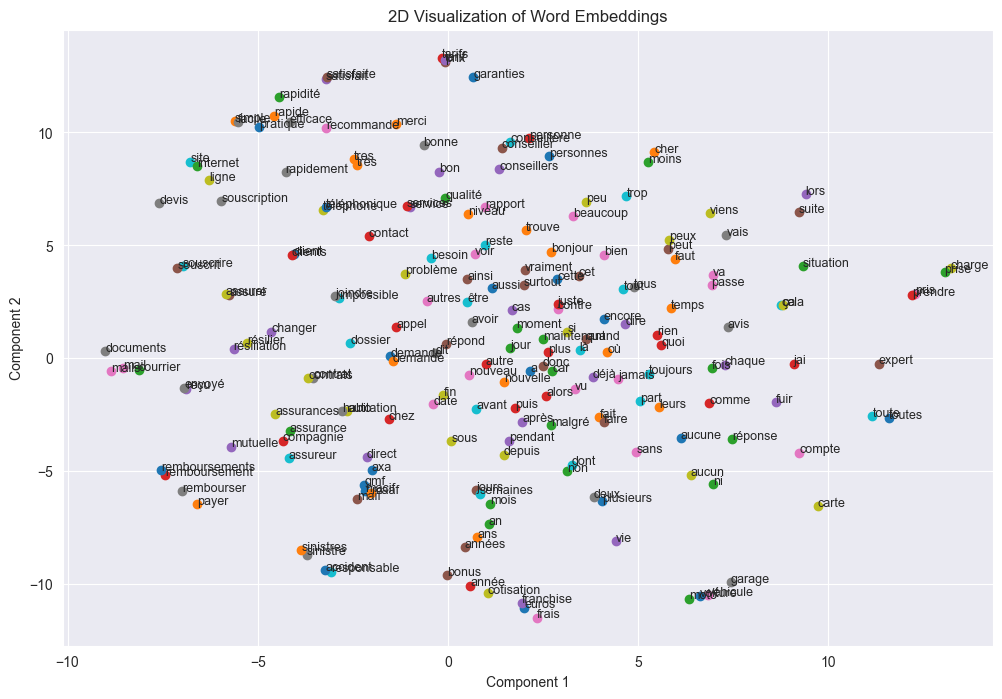

In [48]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
words = list(model.wv.index_to_key)[:200]  # Limit to first 200 words for clarity
word_vectors = model.wv[words]
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1])
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]), fontsize=9)
plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

We can notice that words with similar meanings or contexts are grouped together, demonstrating the semantic structure captured by the Word2Vec model.

For example "satisfaite", "simple", "rapide" are clustered, indicating customer satisfaction and ease of service; "tarif", "rapport", "devis" are grouped, reflecting pricing-related discussions.

We can also find semantic relationships: words related to service experience (like "client", "service", "téléphonique") form a distinct region, just like words about documents and claims ("dossier", "contrat", "remboursement") which appear near each other.

# 5. 6. Modelling

We have decided to test all the the kind of different models proposed for the project, instead of choosing just one.
Therefore, in this section we will build and train various kind of models that aims to fulfill different tasks and use-cases on the dataset. Specifically, we will build:
- A sentiment analysis model using TF-IDF and classic ML
- A basic model with an embedding layer to predict the stars rating of reviews
- A model with pre-trained embeddings to classify reviews into predefined categories
- A model using Universal Sentence Embedding (USE) to perform semantic search
- A LLM model to generate concise summaries of reviews for a specified insurer.

Each of these uses cases and their models are shown in the following subsections of this section. Additionally, each of the is also implemented interactively in the Streamlit app.

Finally, notice that we have decided to use the reviews in their french version for all the following use cases, in order to make the training and model selection more challenging and interesting.

## TF-IDF and classic ML

In this section we'll predict binary sentiment classification (positive or negative sentiment) using TF-IDF and classical machine learning  (implementing a Logistic Regression).

The model is also implemented in the Streamlit app, where the user can input a review and get the predicted sentiment.

### Data Preparation

First, the dataset will be labeled with **positive** if the rating is 4 or 5 and **negative** if the rating is 1 or 2. Ratings of 3 will be excluded to maintain a clear distinction between positive and negative classes.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

reviews = df[['avis', 'note']].copy()

# sentiment into binary classification
def label_sentiment(row):
    if row['note'] >= 4:
        return "positive"
    elif row['note'] <= 2:
        return "negative"
    else:
        return None

reviews['sentiment'] = reviews.apply(label_sentiment, axis=1)
reviews = reviews.dropna(subset=['sentiment'])  # Drop rows with 3 stars

reviews.to_pickle(os.path.join(data_path, 'dataset_cleaned_sentiment.pkl'))

X = reviews['avis']
y = reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and training

The model is built with the following steps:
1. **TF-IDF Vectorization**: The reviews are converted into TF-IDF features to represent the text data numerically.
2. **Logistic Regression**: A Logistic Regression model is trained on the TF-IDF features to classify reviews into positive or negative sentiment.


In [50]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9378

Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.96      0.94      2179
    positive       0.95      0.92      0.93      1966

    accuracy                           0.94      4145
   macro avg       0.94      0.94      0.94      4145
weighted avg       0.94      0.94      0.94      4145



The model achieved a very high accuracy, indicating that it can effectively classify reviews into positive or negative sentiment based on their content.

The high accuracy can probably be justified by the clear distinction between positive and negative reviews, having removed the neutral review, as well as the effectiveness of TF-IDF features in capturing the sentiment of the reviews.

In [51]:
# Save the model

model_path = os.path.join(models_path, 'sentiment_analysis_model.pkl')
if not os.path.exists(model_path):
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

### Model testing

The model is tested with a sample review to predict its sentiment.

In [52]:
# Example usage
example_review = "Service client va bien."
example_tfidf = vectorizer.transform([example_review])
predicted_sentiment = model.predict(example_tfidf)
print(f"Predicted Sentiment for '{example_review}': {predicted_sentiment[0]}")

Predicted Sentiment for 'Service client va bien.': positive


The model correctly predicted the sentiment of the sample review as positive, indicating that it is able to classify reviews effectively based on their content.

##  Basic Model with Embedding Layer

The model developed in this section aims to predict the star rating of reviews using a basic neural network with an embedding layer.

The use case is also implemented in the Streamlit app, where the user can input a review and get the predicted star rating.

### Data Preparation

As first step, the textual data is preprocessed by splitting the data into training and test sets, scaling the target star ratings to the range [0, 1], and tokenizing and padding the review text into uniform sequences. Invalid target values are removed to ensure the data is clean and suitable for training the neural network.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.initializers import RandomUniform

reviews = df[['avis', 'note']].copy()

X = reviews['avis']
y = reviews['note']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale target values to the range [0, 1]
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Remove or replace invalid targets
valid_indices = ~pd.isnull(y_train_scaled).ravel()
X_train_padded = X_train_padded[valid_indices]
y_train_scaled = y_train_scaled[valid_indices]

valid_indices = ~pd.isnull(y_test_scaled).ravel()
X_test_padded = X_test_padded[valid_indices]
y_test_scaled = y_test_scaled[valid_indices]

### Model Building and Training

The model is built with the following caracteristics:
- **Embedding Layer**: This layer maps each word to a dense vector representation of fixed size. This layer is trained during the model fitting, enabling the network to learn semantic relationships between words. Instead of using pre-trained embeddings, we let the model learn embeddings specific to the dataset, capturing unique word usage patterns in reviews.
- **Global Average Pooling**: The global average pooling layer aggregates the word embeddings for each review, providing a fixed-size representation regardless of the review length. This layer simplifies the model by aggregating information from all words in a review into a single fixed-length vector, reducing computational complexity and overfitting risk.
- **Fully Connected Dense Layer**: The applies non-linear transformations to learn complex patterns.
- **Regression Output**: The final output layer is a single neuron with a linear activation function, designed to predict a continuous value (the star rating).
- **Optimization**: Adam optimizer with gradient clipping is used to prevent issues like exploding gradients.


In [54]:
# Neural network with an embedding layer
embedding_dim = 50  # Dimension of word embeddings

model = Sequential([
    Embedding(input_dim=max_words,
              output_dim=embedding_dim,
              input_length=max_len,
              embeddings_initializer=RandomUniform(minval=-0.05, maxval=0.05)),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_padded, y_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_mae = model.evaluate(X_test_padded, y_test_scaled, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Epoch 1/10


/opt/anaconda3/envs/Project1-MachineLearningForNLP/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1146 - mae: 0.2842 - val_loss: 0.0633 - val_mae: 0.2015
Epoch 2/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0567 - mae: 0.1899 - val_loss: 0.0548 - val_mae: 0.1904
Epoch 3/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0465 - mae: 0.1699 - val_loss: 0.0499 - val_mae: 0.1753
Epoch 4/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0391 - mae: 0.1541 - val_loss: 0.0471 - val_mae: 0.1718
Epoch 5/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0364 - mae: 0.1469 - val_loss: 0.0471 - val_mae: 0.1703
Epoch 6/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0334 - mae: 0.1401 - val_loss: 0.0478 - val_mae: 0.1690
Epoch 7/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0316 - mae: 0.1353 - val_loss: 0.0496 - val_mae: 0.1781
Epoch 8/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0291 - mae: 0.1288 - val_loss: 0.0490 - val_mae: 0.1783
Epoch 9/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0291 

The MSE loss decreases steadily and the MAE drops over 10 epochs: this shows that the model is learning effectively on the training data.

The validation MSE stabilizes around 0.05, and the MAE converged around 0.17: these values are close to the training metrics, indicating that the model generalizes well and is not overfitting.

Finally, on the test set, the MSE and the MAE obtained align closely with the validation performance.

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,509,989 (5.76 MB)

 Trainable params: 503,329 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,006,660 (3.84 MB)

In [56]:
# Save the model
model.save(os.path.join(models_path, 'star_rating_prediction_model.keras'))

### Model testing

The goal of this task is to predict star ratings based on review text: here we test the trained model with a sample review and evaluate its performance.

This implementation demonstrates the power of embeddings and basic neural networks in regression tasks, bridging textual and numerical data effectively.

In [57]:
# Example usage
example_review = "Service rapide et excellent."
example_seq = tokenizer.texts_to_sequences([example_review])
example_padded = pad_sequences(example_seq, maxlen=max_len, padding='post')
predicted_rating_scaled = model.predict(example_padded)
predicted_rating = scaler.inverse_transform(predicted_rating_scaled)
print(f"Predicted Rating for '{example_review}': {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Rating for 'Service rapide et excellent.': 4.46


The predicted rating for the sample review is around 4.4, which makes sense for a review indicating high satisfaction. The prediction aligns with expectations, showcasing the model’s ability to interpret text sentiment accurately.

## Model with pre-trained embeddings

The model developed in this section aims to classify reviews into the found categories (in section #3) using pre-trained embeddings. The embeddings capture semantic relationships between words and serve as input to a simple neural network for classification.

The development process involves the following steps:
1. Load pre-trained word embeddings (GloVe).
2. process the reviews (tokenize and pad).
3. Map the tokens to their pre-trained embedding vectors.
4. Train of a simple neural network on the embedding representations to classify reviews into categories.

The model is also implemented in the Streamlit app, where the user can input a sample review and get the predicted category.

### Data Preparation

The dataset and pre-trained embeddings are prepared for the neural network to classify reviews into predefined topics. The reviews are tokenized into sequences of integers and padded to ensure uniform length, while the target categories are converted into a one-hot encoded format for multi-class classification.

Next, pre-trained GloVe embeddings are loaded, which provide dense vector representations for words. An embedding matrix is constructed, where each row corresponds to a word in the vocabulary, and its values are initialized with the corresponding GloVe embedding if available. This matrix will later be used in the embedding layer of the neural network to incorporate semantic knowledge into the model.

In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
import zipfile

X = df["avis"]
y = pd.get_dummies(df['topic'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000  # Vocabulary size
max_len = 50       # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

embedding_dim = 50
embedding_index = {}

if not os.path.exists(os.path.join(main_path,"glove.6B.50d.txt")):
    with zipfile.ZipFile(os.path.join(main_path,"glove.6B.50d.txt.zip"), "r") as z:
        z.extractall(path=main_path)

with open(os.path.join(main_path,"glove.6B.50d.txt"), encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Embedding matrix
word_index = tokenizer.word_index
num_tokens = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### Model Building and Training

The model is built with the following layers, trying to simplicity and performance:

1. **Embedding Layer**: This layer initializes word embeddings with the pre-trained GloVe embeddings stored in the embedding_matrix. By using pre-trained embeddings, the model benefits from prior knowledge of word meanings, which enhances performance even with limited labeled data.
2. **Global Average Pooling Layer**: This layer reduces the sequence of word embeddings into a single fixed-length vector by averaging the embeddings across all words in a review. It simplifies the model by aggregating information, reducing the risk of overfitting, and ensuring that the input size is fixed regardless of the sequence length.
3. **Dense Layer (Hidden Layer)**: A fully connected layer with 64 units and a ReLU activation function introduces non-linearity to the model, allowing it to learn complex patterns in the data.
4. **Output Layer**: The output layer uses a softmax activation function and has as many neurons as the number of target categories (y_train.shape[1]), making it suitable for multi-class classification.

The model uses categorical crossentropy, which is the standard loss function for multi-class classification, measuring the difference between the predicted probability distribution and the true distribution. Additionally, the Adam optimizer is chosen for its efficiency and ability to adapt learning rates during training, leading to faster convergence.

In [59]:
# Set up TensorBoard log directory
log_dir = os.path.join(main_path, "tensorflow_logs/category_embeddings")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Prepare metadata for embeddings (word to index mapping)
metadata_path = os.path.join(log_dir, "metadata.tsv")
with open(metadata_path, "w") as f:
    for word, i in word_index.items():
        if i < max_words:
            f.write(f"{word}\n")

In [60]:
# Build the model
model = Sequential([
    Embedding(input_dim=num_tokens,
              output_dim=embedding_dim,
              embeddings_initializer=Constant(embedding_matrix),
              input_length=max_len,
              trainable=True),  # Freeze embeddings
    GlobalAveragePooling1D(),
    Dense(64, activation="relu"),
    Dense(y_train.shape[1], activation="softmax")  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10


/opt/anaconda3/envs/Project1-MachineLearningForNLP/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6973 - loss: 0.8142 - val_accuracy: 0.8419 - val_loss: 0.4057
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3450 - val_accuracy: 0.8829 - val_loss: 0.2978
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9110 - loss: 0.2423 - val_accuracy: 0.8773 - val_loss: 0.3114
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9324 - loss: 0.1876 - val_accuracy: 0.8971 - val_loss: 0.2659
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1473 - val_accuracy: 0.8985 - val_loss: 0.2743
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9578 - loss: 0.1228 - val_accuracy: 0.9036 - val_loss: 0.2754
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0915 - val_accuracy: 0.9091 - val_loss: 0.2746
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0798 - val_accuracy: 0.8931 - val_

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 50)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,510,574 (5.76 MB)

 Trainable params: 503,524 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,007,050 (3.84 MB)

In [62]:
# Save the model
if not os.path.exists(os.path.join(models_path, 'topic_classification_model.keras')):
    model.save(os.path.join(models_path, 'topic_classification_model.keras'))

### Model testing

The goal of this task is to predict the category of a review based on its content. Here we test the trained model with a sample review and evaluate its performance.

In [63]:
# Example prediction
example_review = "Prix raisonnables pour un bon service"
example_seq = tokenizer.texts_to_sequences([example_review])
example_padded = pad_sequences(example_seq, maxlen=max_len, padding='post')
predicted_category = model.predict(example_padded)
category_labels = y.columns
predicted_label = category_labels[np.argmax(predicted_category)]
print(f"Predicted Category for '{example_review}': {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Category for 'Prix raisonnables pour un bon service': Satisfaction and Pricing


The predicted category for the sample review is "Satisfaction and Pricing", which aligns with the content of the review. The model successfully classified the review into the correct category, demonstrating its ability to generalize and make accurate predictions on unseen data.

### TensorBoard Embedding Visualization

In [64]:
%load_ext tensorboard

In [65]:
import tensorflow as tf

# Save the embedding weights
weights = model.layers[0].get_weights()[0]
embedding_weights_path = os.path.join(log_dir, "embedding_weights.tsv")
np.savetxt(embedding_weights_path, weights, delimiter="\t")

embedding_var = tf.Variable(weights, name="embedding_weights")

# Create a checkpoint
checkpoint = tf.train.Checkpoint(embedding=embedding_var)
checkpoint_path = log_dir + "/embedding.ckpt"
checkpoint.write(checkpoint_path)
print(f"Checkpoint saved to {checkpoint_path}")

# Write summary for TensorBoard projector
writer = tf.summary.create_file_writer(log_dir)
with writer.as_default():
    tf.summary.text("Metadata", metadata_path, step=0)

print(f"Embedding visualization files saved to {log_dir}. Run TensorBoard to view embeddings:")
print(f"tensorboard --logdir={log_dir}")

Checkpoint saved to tensorflow_logs/category_embeddings/embedding.ckpt
Embedding visualization files saved to tensorflow_logs/category_embeddings. Run TensorBoard to view embeddings:
tensorboard --logdir=tensorflow_logs/category_embeddings


In [66]:
log_dir = f'"{log_dir}"'
%tensorboard --logdir  {log_dir}

## USE (Universal Sentence Embedding)

In this use case, we will use the Universal Sentence Encoder (USE) to encode both reviews and search queries into dense vectors. By calculating cosine similarity between the query and the reviews, we can retrieve and rank the most relevant reviews.

This use case is also implemented in the Streamlit app, where the user can input a query and get the top k most relevant reviews.

### Preliminary steps

Each review and query is converted into a 512-dimensional dense vector using the USE model.

In [67]:
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity

# Load the Universal Sentence Encoder model
print("Loading Universal Sentence Encoder...")
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print("Model loaded!")

# Encode all reviews using the Universal Sentence Encoder
print("Encoding reviews...")
review_embeddings = embed(df["avis"].tolist())
print("Reviews encoded!")

#save the embeddings
if not os.path.exists(os.path.join(models_path, 'review_embeddings.npy')):
    np.save(os.path.join(models_path, 'review_embeddings.npy'), review_embeddings)

Loading Universal Sentence Encoder...
Model loaded!
Encoding reviews...
Reviews encoded!


### Semantic Search

The semantic search function takes a query as input and computes the cosine similarity between the query embedding and all review embeddings. The reviews are then ranked based on their similarity scores, and the top-k most similar reviews are returned along with their scores.

In [68]:
def semantic_search(query, embeddings, top_k=3):
    query_embedding = embed([query])

    similarities = cosine_similarity(query_embedding, embeddings).flatten()

    top_indices = similarities.argsort()[-top_k:][::-1]

    results = [
        {
            "avis": df["avis"].iloc[i],
            "assureur": df["assureur"].iloc[i],
            "produit": df["produit"].iloc[i],
            "score": similarities[i]
        }
        for i in top_indices
    ]
    return results

# Example Query
query = "Quel est le service client le plus rapide ?"
top_results = semantic_search(query, review_embeddings, top_k=3)

# Display the results
print(f"\nQuery: {query}")
print("Top Results:")
for result in top_results:
    print(
        f"- Review: {result['avis']}\n"
        f"  Assureur: {result['assureur']}\n"
        f"  Product: {result['produit']}\n"
        f"  Similarity Score: {result['score']:.4f}\n"
    )


Query: Quel est le service client le plus rapide ?
Top Results:
- Review: prix service plus compétitif service client présent répond rapidement questions démarches via internet très simple rapide
  Assureur: Direct Assurance
  Product: auto
  Similarity Score: 0.6277

- Review: service client tout simplement déplorable
  Assureur: MAIF
  Product: habitation
  Similarity Score: 0.5896

- Review: super service client merci a professionnalisme rapide très efficace fait assuré quelque minutes vraiment top
  Assureur: Direct Assurance
  Product: auto
  Similarity Score: 0.5884



The semantic search function successfully retrieved the most relevant reviews based on the query, demonstrating the effectiveness of semantic search in retrieving information from a large corpus of reviews.

## LLM

In this seciton we are going to use the `t5-base-fr-sum-cnndm` model to generate concise summaries of reviews for a specified insurer.

The goal is to summarize the key points, including positive and negative aspects. The summarization process is developed considering the computational constraints and ensure meaningful output.

The use case is also implemented in the Streamlit app, where the user can input an assureur and get the summarized reviews of that assureur.

### Model Definition

The reviews of the given assureur are first deduplicated using list(set(reviews)) to remove redundant content. This reduces input noise and ensures the summarization focuses on unique feedback.

Only 50 reviews are used per assureur, and the input is capped at 1024 tokens to meet the model’s computational constraints and tokenization limits, in order to limit the risk of memory errors and ensures efficient processing.

A guiding prompt instructs the model to summarize the reviews in one or two sentences, highlighting positive and negative aspects. This helps the model focus on generating structured and concise outputs.

Only the first sentence of the output is retained to ensure the summary is brief and captures the main points effectively.

In [69]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "plguillou/t5-base-fr-sum-cnndm"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def get_first_sentence(text):
    period_pos = text.find('.')
    if period_pos != -1:
        return text[:period_pos + 1]
    return text

# Summarization function
def generate_insurer_summary(insurer_name, df):
    reviews = df[df['assureur'] == insurer_name]['avis'].tolist()
    reviews = list(set(reviews))
    
    aggregated_reviews = "\n".join([f"- {review}" for review in reviews[:50]])

    # Guiding prompt
    prompt = (
            f"Voici des avis des clients pour l'assureur {insurer_name}. Résumez ces avis en français en une ou deux phrases, en mettant en évidence "
            "les points positifs, les points négatifs:\n"
            + aggregated_reviews
    )

    # Summarize the reviews
    inputs = tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=80, min_length=10, length_penalty=3, num_beams=4)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    summary = get_first_sentence(summary)
    return summary

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


### Model Testing

The model is tested with a assureur to generate a summary of reviews.

In [71]:
insurer_name = "Zen'Up"
summary = generate_insurer_summary(insurer_name, df)
print(f"Summary for {insurer_name}:\n{summary}")

Summary for Zen'Up:
Résultats positifs et négatifs : - très bon accueil téléphonique conseillère très disponible professionnelle - très satisfait service échanges très rapide rapide conseiller reste a lécoute cas besoin meilleurs choix recommande zen'up entourage espérant aussi satisfait - satisfait service a recommand


This implementation effectively balances computational efficiency and output quality. By limiting the input size, carefully designing the prompt, and post-processing the generated text, the model produces clear and concise summaries tailored for insurer reviews.

Testing different inputs, we can conclude that, generally speaking, on average the model delivers good summaries of the reviews, considering the simplicity of the model and the constraints of the task.

# 7. Streamlit Applications

The Streamlit application has been developed integrating all the uses cases and data exploration sections illustratred in this notebook. All these feautres are available in a single Streamlit app using pages and sidebar navigation.

The Streamlit app can be fired up by running the following command in the terminal:
```bash
streamlit run entrypoint.py
```
or on the streamlit Community Cloud: [Streamlit App](https://ml4nlp-project2-6qzrsnb3spgf3gqd9hekpf.streamlit.app)